**TRAINING A DATASET TO DEVELOP A MODEL TO IDENTIFY DIFFERENT HUMAN ACTIVITIES**

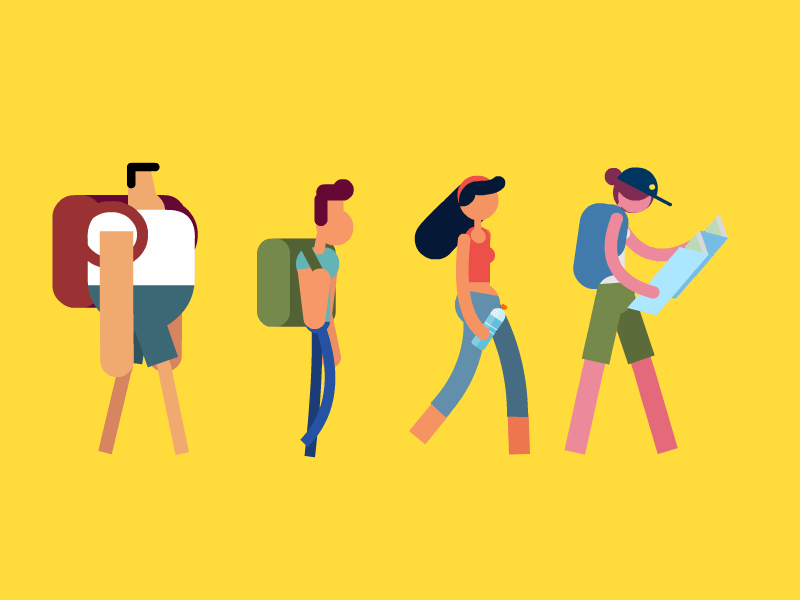

Importing basic libraries to be used during the model dvelopment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Fetching data from stored location using pandas and converting the .csv file to pandas DataFrame

In [2]:
data= pd.read_csv('train.csv')

df= pd.DataFrame(data)
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
df.shape

(7352, 563)

There are 563 columns and 7352 rows in the dataset

**CLEANING THE DATASET - CHECKING FOR MISSING VALUE & DUPLICATES**


As there are 563 columns, so we are not plotting visuals for detecting missing values. However we can check the total number of missing values present in the data set by executing the below code.

In [4]:
df.isnull().sum().sum()

0

The above code will give us the total of the misisng data points presentin the dataset. As the returned valued is 0, so there are no mising values in the data frame.

In [5]:
print("Number of duplicate values in train dataset are", df.duplicated().sum())

Number of duplicate values in train dataset are 0


We can see that there are no Duplicates in the data

**EXPLORATORY DATA ANALYSIS**

We will try to understand the data better through the help of some plottings.

**Bar Plot**

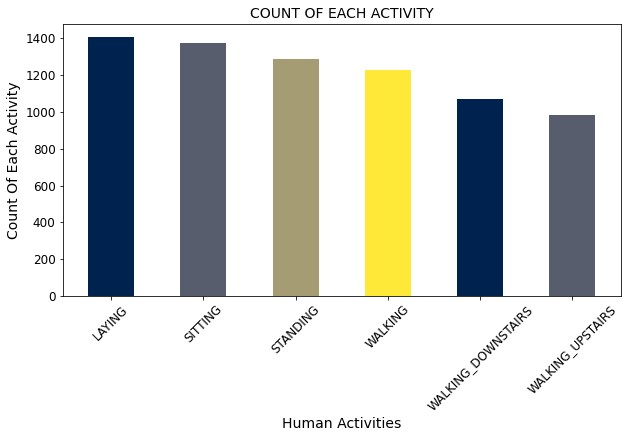

In [6]:
Human_Activities= sorted(df['Activity'].unique())
Count_of_activity= np.array(df['Activity'].value_counts())
plt.figure(figsize=(10,5))
color= cm.cividis(np.linspace(0, 1, 4))
plt.bar(Human_Activities,Count_of_activity,color=color,width=0.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Human Activities',fontsize=14)
plt.ylabel('Count Of Each Activity',fontsize=14)
plt.title('COUNT OF EACH ACTIVITY',fontsize=14)
plt.show()

So from the above plot we can conclude that that there are 6 different activities to be classified basis the data set. Also there are significant amount of data for each activity.

**Histogram**

In [7]:
import plotly.express as px

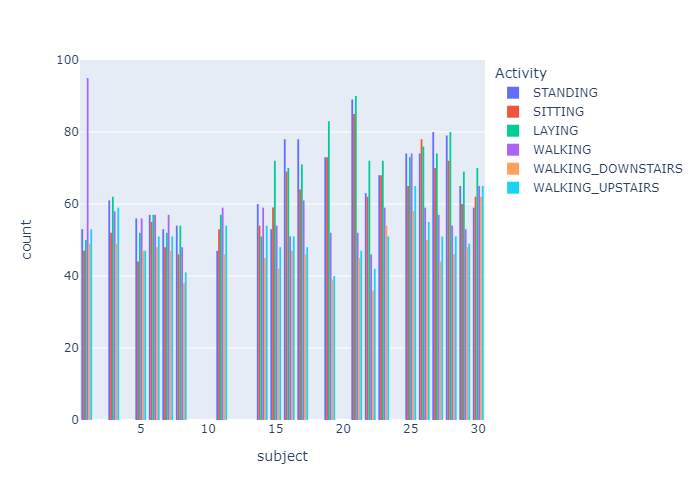

In [8]:
fig=px.histogram(data_frame=df, x="subject", color="Activity",barmode='group')
fig.show("png")

From the above plot we can conclude that for all the subjects we have got almost simillar amount of observations. There is no major imbalance in data.

**BOX PLOT**

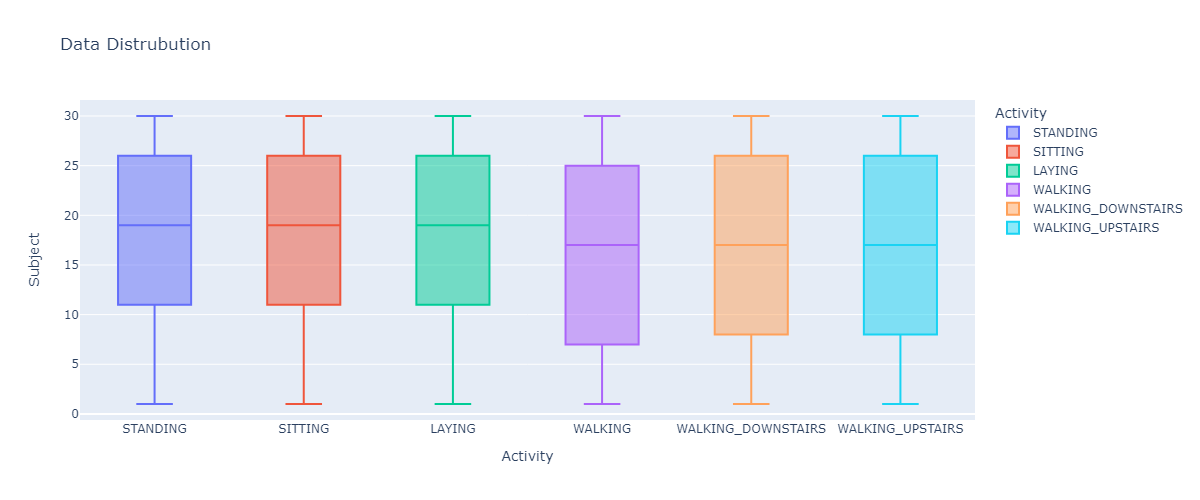

In [9]:
fig = px.box(df, y='subject', x="Activity",color="Activity",width=1200,boxmode="overlay",title= 'Data Distrubution',labels={'subject': 'Subject'})
fig.show("png")


From the above Box Plot we can conclude that Data is balanced

From the column names we can see that the data collection is done mostly based on 2 sensors- Accelerometer and Gyroscope and there might be some other parameters. We will check the distrubution of columns betweens the 3 Categories- Accelerometer and Gyroscope and Others

<BarContainer object of 3 artists>

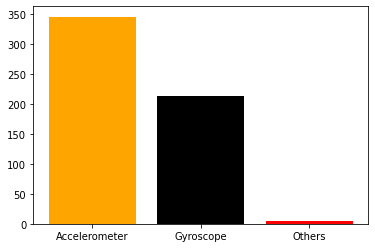

In [10]:
Acc = 0
Gyro = 0
other = 0

for value in df.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1

plt.figure(figsize=(6,4))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('Orange','black','red'))

We can see that most of the data Columns are from Accelerometer followed by Gyroscope. Data from other sources are negligible

**FEATURES & LABEL BIFURCATION**

We will bifurcate the Features and Labels and store them in different avariable for further analysis.

The Features Will be stored in the varibale **X** and label or dependent variable will be stored in **y** object.

We are dropping the column **'subject'** as it is a number assigned to the 30 participants and not making any impact on the label.

In [11]:
X= df.drop(columns=['subject','Activity'])
y= df['Activity']

As the Label **Activity** is Categorical here we will have to Encode the labels using Label encoding. One Hot encoding is not required as all other columns are continious

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

**We will split the data (X and y) into Train and Test**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

**MODEL DEVELOPMENT**

We will develop a **KNN Classififer** model and check the accuracy

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
model = KNeighborsClassifier().fit(X_train, y_train)

In [18]:
prediction = model.predict(X_test)

In [19]:
accuracy_knn = accuracy_score(y_test, prediction)*100
KNN=print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_knn))

K Nearest Neighbors Classifier accuracy: 96.39700883752549%


We will develop a **Support Vector Classifier** model and check the accuracy

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [21]:
model = SVC().fit(X_train, y_train)

In [22]:
prediction = model.predict(X_test)

In [23]:
accuracy_svm = accuracy_score(y_test, prediction)*100
SVM=print('Support Vector Classifier accuracy: {}%'.format(accuracy_svm))

Support Vector Classifier accuracy: 96.80489462950374%


We will develop a **Logistic Regression** model and check the accuracy

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression().fit(X_train, y_train)

C:\My installs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
prediction = model.predict(X_test)

In [27]:
accuracy_LR = accuracy_score(y_test, prediction)*100
LR=print('Logistic Regression accuracy: {}%'.format(accuracy_LR))

Logistic Regression accuracy: 97.96057104010877%


We will plot a graph for the Accuracy of the different  models

<ipython-input-28-47e1af8b3572>:3: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



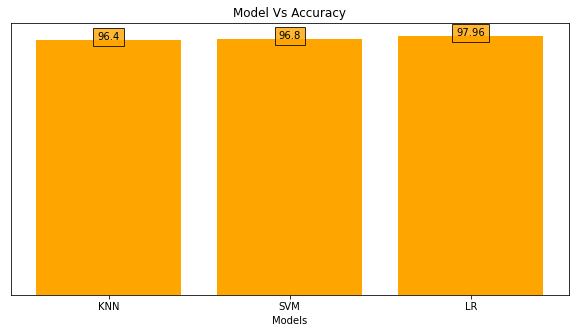

In [28]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center',Bbox = dict(facecolor = 'orange', alpha =.8))

y = [96.40,96.80,97.96]


x = ['KNN',"SVM",'LR']
plt.figure(figsize=(10,5))
plt.bar(x, y,color='orange')
addlabels(x, y)
plt.xlabel('Models')

plt.title('Model Vs Accuracy')

plt.yticks([])
plt.show()

**LOGISTIC REGRESSION** HAS GIVEN US THE HIGHEST ACCURACY OF 97.96 %